In [32]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('winequality.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

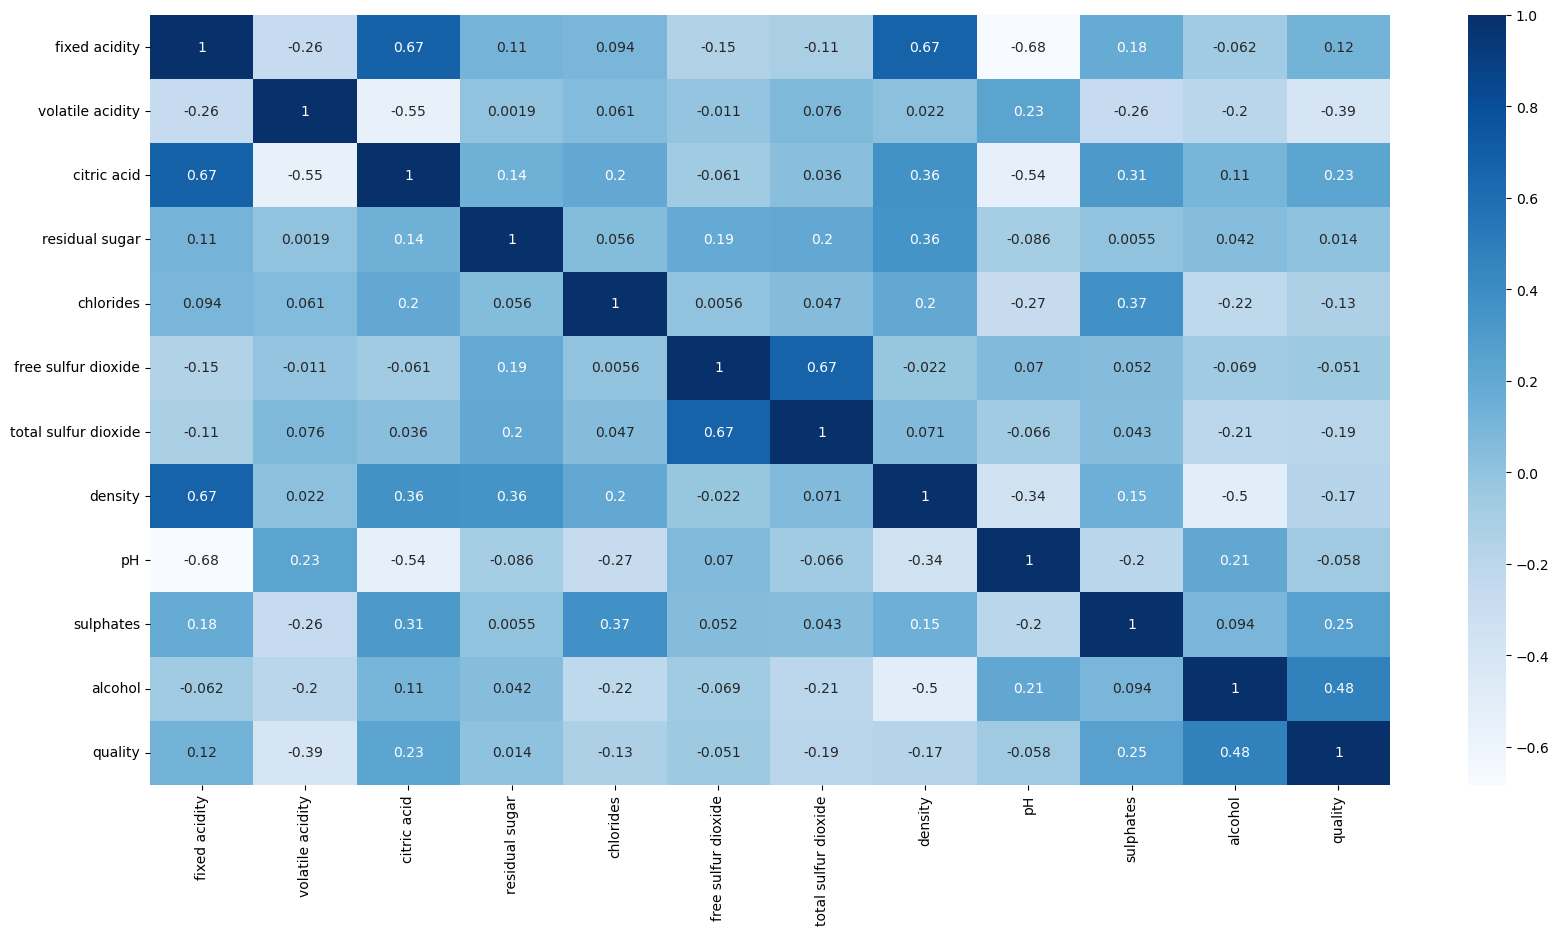

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

C:\Users\aasho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

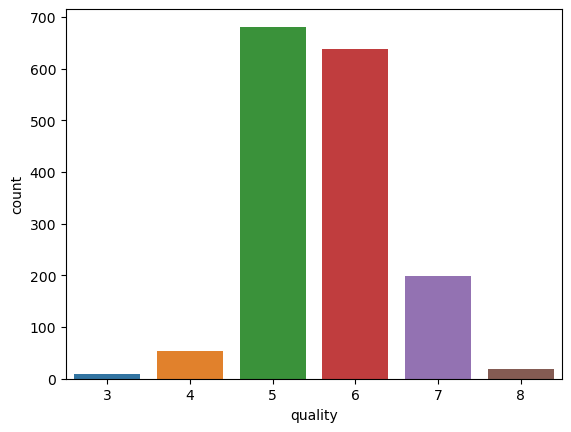

In [8]:
sns.countplot(data['quality'])

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

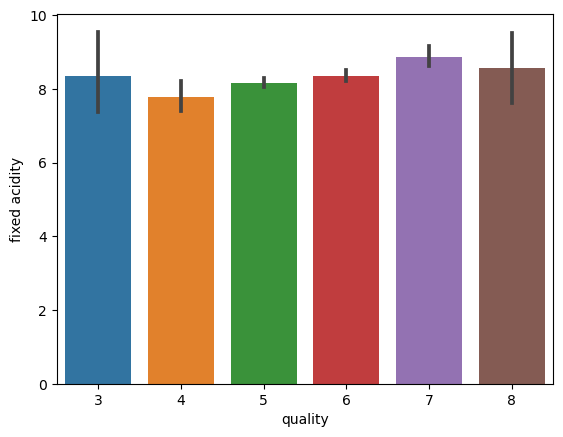

In [9]:
sns.barplot(x='quality',y='fixed acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

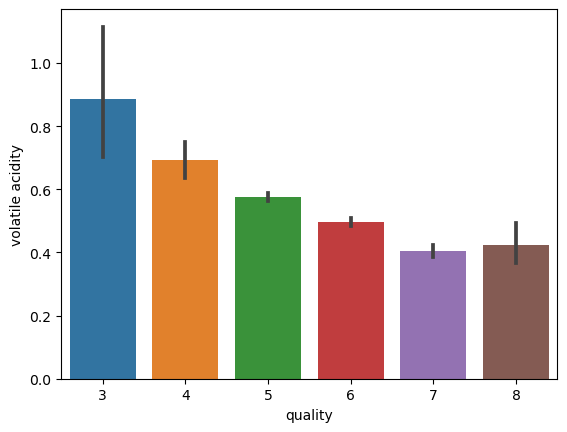

In [10]:
sns.barplot(x='quality',y='volatile acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

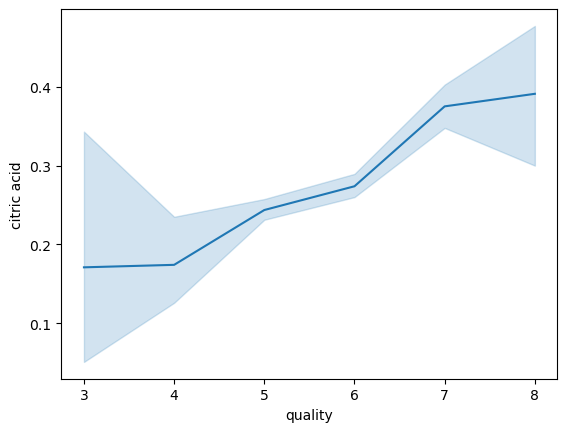

In [11]:
sns.lineplot(y='citric acid',x='quality',data=data)

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

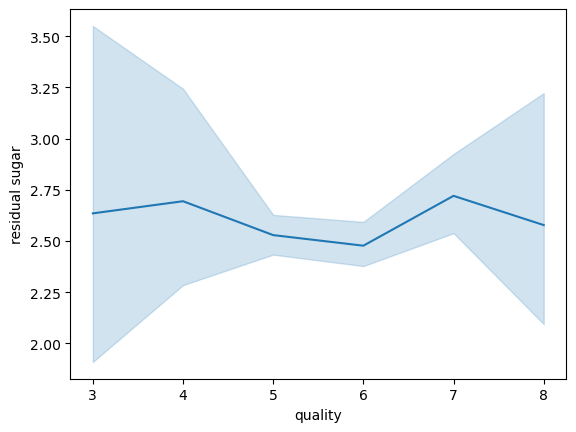

In [13]:
sns.lineplot(y='residual sugar',x='quality',data=data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

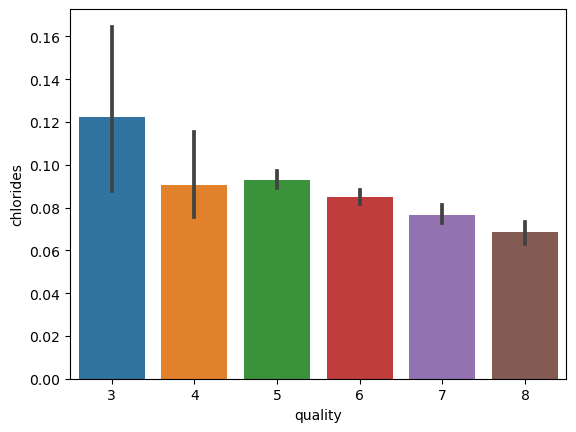

In [14]:
sns.barplot(x='quality',y='chlorides',data=data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

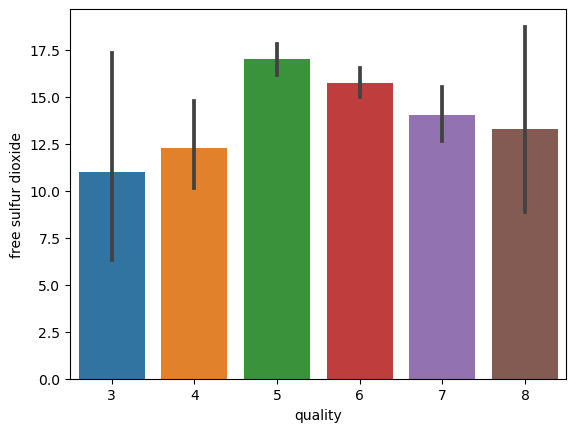

In [15]:
sns.barplot(x='quality',y='free sulfur dioxide',data=data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

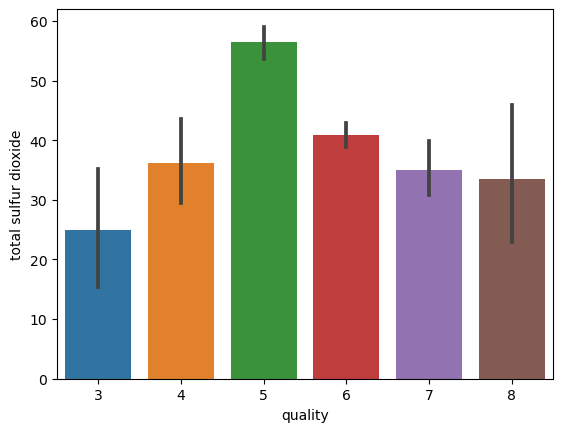

In [16]:
sns.barplot(x='quality',y='total sulfur dioxide',data=data)

<AxesSubplot:xlabel='quality', ylabel='density'>

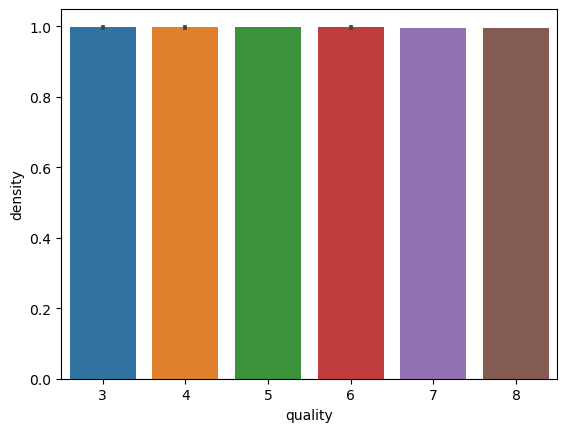

In [17]:
sns.barplot(x='quality',y='density',data=data)

In [18]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
values = [2,6,9]
qual = ['Good','Bad']
data['quality'] = pd.cut(data['quality'],bins=values,labels=qual)

In [20]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [21]:
x = data.drop('quality',axis=1)

y = data['quality']

std = StandardScaler()


In [22]:
x = data.drop('quality',axis=1)
y = data['quality']

In [23]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int32


In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
std = StandardScaler()
xtrain = std.fit_transform(xtrain)
pred = std.fit_transform(xtest)

# Fitting with models

In [27]:
model1 = RandomForestClassifier()
model1.fit(xtrain,ytrain)
pred = model1.predict(xtest)
print('Accuracy of the model:',accuracy_score(ytest,pred))

Accuracy of the model: 0.853125


C:\Users\aasho\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [53]:
model = svm.SVC()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print("Accuracy score of model is:",accuracy_score(ytest,pred))

Accuracy score of model is: 0.875


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit_transform(x)

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
model = classifier_log.fit(xtrain,ytrain)

y_pred_log = classifier_log.predict(xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log, ytest)*100)

75.0


C:\Users\aasho\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
